In [91]:
import pandas as pd
import numpy as np

<h4>Question</h4>
<p> Build a Model to predict the claims of a male who is 23yrs old with bmi of 28 and has no child neither does he smoke</p>

In [92]:
df = pd.read_csv('data/insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
5,31,female,25.740,0.0,no,southeast,3756.62160
6,46,female,33.440,1.0,no,southeast,8240.58960
7,37,female,27.740,3.0,no,northwest,7281.50560
8,37,male,29.830,2.0,no,northeast,6406.41070
9,60,female,25.840,0.0,no,northwest,28923.13692


In [93]:
# data Exploration
df.age.min()

18

In [94]:
df.age.max()

64

In [95]:
# Columns and row Check
df.shape

(1342, 7)

In [96]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [97]:
#the data types 
df.dtypes

age           int64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [98]:
# Number of regions available
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast', nan],
      dtype=object)

In [99]:
# ENcoding - Sex, Region and Smoker

In [100]:

df.smoker.unique()

array(['yes', 'no', nan], dtype=object)

In [101]:
# Check for Missing values
df.isnull().sum()

age         0
sex         0
bmi         2
children    5
smoker      1
region      3
charges     2
dtype: int64

In [102]:
# methods of handling Missing values 
# Dropping, mean. median,mode, interpolation

In [103]:
# handling Misiing Values in  particular  Column = BMI
df1 = df.copy()

In [104]:
df1.dropna(subset=['bmi'],inplace=True)

In [105]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    5
smoker      1
region      3
charges     2
dtype: int64

<h3>Hanlding Missing data for Children Column</h3>

In [106]:
#using fill na - state the reason why you have chosen the method to handle the NAN
df1.isnull().sum()

age         0
sex         0
bmi         0
children    5
smoker      1
region      3
charges     2
dtype: int64

In [107]:
df2= df1.copy()

In [108]:
# Filling NAN for only a Column
df2 = df2.fillna({'children':0})

In [109]:
df2.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      1
region      3
charges     2
dtype: int64

In [110]:
df3 = df2.copy()

In [111]:
# handling Missing data in Smoker - state your reason 
df3 = df3.dropna(subset=['smoker','region'])

In [112]:
df3.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     2
dtype: int64

In [113]:
# using mean to hande the Charges Missing Data 
df4 = df3.copy()

In [114]:
get_mean = df4.charges.mean()
get_mean

13245.02352624363

In [115]:
df4 = df4.fillna({'charges':get_mean})

In [116]:
df4.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [117]:
df4.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
5,31,female,25.740,0.0,no,southeast,3756.62160
6,46,female,33.440,1.0,no,southeast,8240.58960
7,37,female,27.740,3.0,no,northwest,7281.50560
8,37,male,29.830,2.0,no,northeast,6406.41070
9,60,female,25.840,0.0,no,northwest,28923.13692


In [118]:
#Dealing with only Concerned Columns
df5 = df4.copy()

In [119]:
# Dropping the Region Column sinceits not part of our question
df5 = df5.drop(columns=(['region']))
# #mthod 3
#df5.drop(columns=(['region']),inplace=True)

In [120]:
df5

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0.0,yes,16884.92400
1,18,male,33.770,1.0,no,1725.55230
2,28,male,33.000,3.0,no,4449.46200
3,33,male,22.705,0.0,no,21984.47061
4,32,male,28.880,0.0,no,3866.85520
...,...,...,...,...,...,...
1337,50,male,30.970,3.0,no,10600.54830
1338,18,female,31.920,0.0,no,2205.98080
1339,18,female,36.850,0.0,no,1629.83350
1340,21,female,25.800,0.0,no,2007.94500


<h3> Checking For Duplicates</h3>

In [121]:
#finding Duplicates
df5.duplicated().sum()

5

In [122]:
# Preview Dupliacted Rows
df5.loc[df5.duplicated(),:]

,age,sex,bmi,children,smoker,charges
14,56,female,39.82,0.0,no,11090.7178
15,56,female,39.82,0.0,no,11090.7178
19,52,female,30.78,0.0,no,10797.3362
51,28,female,34.77,0.0,no,3556.9223
585,19,male,30.59,0.0,no,1639.5631


In [123]:
df5.shape

(1336, 6)

In [124]:
#handling Fuplicates
df5.drop_duplicates(keep='first',inplace=True)

In [125]:
# Showimg data set after Duplicate Removal
df5.shape

(1331, 6)

In [126]:
# Feature Engineering 
# Outliers detection and removal
# Encoding 
#Visualization
# Model and make Predictions

In [127]:
df5.describe()

,age,bmi,children,charges
count,1331.000000,1331.000000,1331.000000,1331.000000
mean,39.229902,30.677385,1.092412,13266.097802
std,14.030302,6.099668,1.207630,12067.299684
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4752.353400
50%,39.000000,30.400000,1.000000,9391.346000
75%,51.000000,34.700000,2.000000,16622.107580
max,64.000000,53.130000,5.000000,63770.428010


#  feature - divide through our claims by 1000
<h3> Feature Engineering</h3>

In [128]:
df5['claimsper1000'] = round(df5.charges/1000,2)

In [129]:
df5

,age,sex,bmi,children,smoker,charges,claimsper1000
0,19,female,27.900,0.0,yes,16884.92400,16.88
1,18,male,33.770,1.0,no,1725.55230,1.73
2,28,male,33.000,3.0,no,4449.46200,4.45
3,33,male,22.705,0.0,no,21984.47061,21.98
4,32,male,28.880,0.0,no,3866.85520,3.87
...,...,...,...,...,...,...,...
1337,50,male,30.970,3.0,no,10600.54830,10.60
1338,18,female,31.920,0.0,no,2205.98080,2.21
1339,18,female,36.850,0.0,no,1629.83350,1.63
1340,21,female,25.800,0.0,no,2007.94500,2.01


In [130]:
df5 = df5.drop(columns=(['charges']))

In [131]:
df5

,age,sex,bmi,children,smoker,claimsper1000
0,19,female,27.900,0.0,yes,16.88
1,18,male,33.770,1.0,no,1.73
2,28,male,33.000,3.0,no,4.45
3,33,male,22.705,0.0,no,21.98
4,32,male,28.880,0.0,no,3.87
...,...,...,...,...,...,...
1337,50,male,30.970,3.0,no,10.60
1338,18,female,31.920,0.0,no,2.21
1339,18,female,36.850,0.0,no,1.63
1340,21,female,25.800,0.0,no,2.01


<h3> Outlier detection</h3>

In [132]:
df6 = df5.copy()

In [133]:
df6.describe()

,age,bmi,children,claimsper1000
count,1331.000000,1331.000000,1331.000000,1331.000000
mean,39.229902,30.677385,1.092412,13.266116
std,14.030302,6.099668,1.207630,12.067234
min,18.000000,15.960000,0.000000,1.120000
25%,27.000000,26.302500,0.000000,4.750000
50%,39.000000,30.400000,1.000000,9.390000
75%,51.000000,34.700000,2.000000,16.625000
max,64.000000,53.130000,5.000000,63.770000


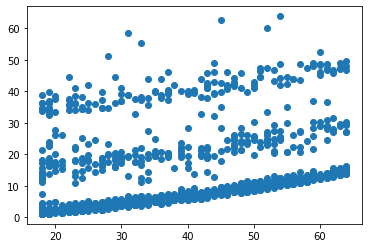

In [134]:
# checking for outliers
from matplotlib import pyplot as plt
plt.scatter(df6.age,df6.claimsper1000)